In [23]:
import numpy as np
from PIL import Image
from math import sin, cos, pi

In [24]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)

In [25]:
def dotted_line(image, x0, y0, x1, y1, count, color):
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

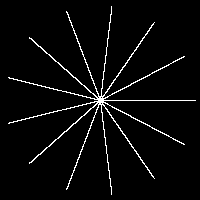

In [27]:
for i in range(13):
    alpha = (2 * pi * i) / 13
    dotted_line(ar, 100, 100, 100 + 95 * cos(alpha), 100 + 95 * sin(alpha), 1000, (255))

img = Image.fromarray(ar, mode="L")
img.save("a.jpg")
img